# 데이터 불러오기

In [3]:
import os

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [4]:
# IMDB 데이터 불러오기
data_set = tf.keras.utils.get_file(
      fname="imdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)  # 압축 해제 여부

84131840/84125825 [==============================] - 3839s 46us/step


In [6]:
# 1. 각 파일에서 리뷰 텍스트를 불러오는 함수

def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
            data["review"].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [7]:
# 2. 각 리뷰에 해당하는 label 값을 가져오는 함수

def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    return pd.concat([pos_df, neg_df])

In [15]:
os.path.dirname(data_set)

'/Users/ohyeji/.keras/datasets'

In [9]:
train_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'train'))
test_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'test'))

In [12]:
train_df

,review,sentiment
0,For a movie that gets no respect there sure ar...,1
1,Bizarre horror movie filled with famous faces ...,1
2,"A solid, if unremarkable film. Matthau, as Ein...",1
3,It's a strange feeling to sit alone in a theat...,1
4,"You probably all already know this by now, but...",1
...,...,...
12495,"My comments may be a bit of a spoiler, for wha...",0
12496,"The ""saucy"" misadventures of four au pairs who...",0
12497,"Oh, those Italians! Assuming that movies about...",0
12498,Eight academy nominations? It's beyond belief....,0


In [13]:
reviews = list(train_df['review'])

# 데이터 분석


In [18]:
# 문자열 문장 리스트를 토크나이즈
tokenized_reviews = [r.split() for r in reviews]

In [19]:
# 토크나이즈 된 리스트에 대한 각 길이를 저장 (단어 개수)
review_len_by_token = [len(t) for t in tokenized_reviews]

In [21]:
# 토크나이즈 된 것을 붙여서 음절의 길이를 저장 (알파벳 개수)
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

/Users/ohyeji/anaconda3/envs/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  app.launch_new_instance()


Text(0, 0.5, 'Number of Reviews')

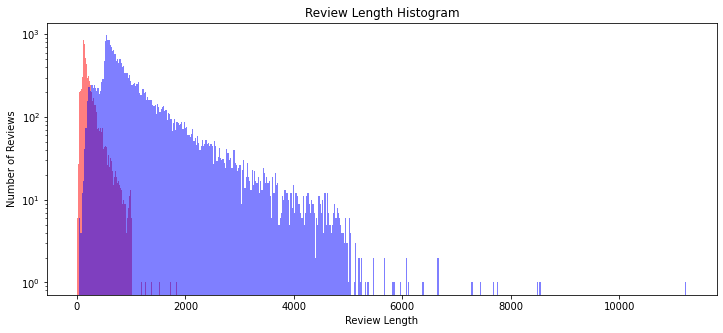

In [27]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))

# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')

plt.yscale('log', nonposy='clip')

# 그래프 제목
plt.title('Review Length Histogram')

# 그래프 x 축 라벨
plt.xlabel('Review Length')

# 그래프 y 축 라벨
plt.ylabel('Number of Reviews')


In [29]:
import numpy as np

print('문장 최대길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간길이: 174.0
제 1 사분위 길이: 127.0
제 3 사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x66cf72780>,
 'caps': [<matplotlib.lines.Line2D at 0x66cf72d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x66cf72518>],
 'medians': [<matplotlib.lines.Line2D at 0x66cf6e320>],
 'fliers': [<matplotlib.lines.Line2D at 0x66cf6e7f0>],
 'means': [<matplotlib.lines.Line2D at 0x66cf6e5f8>]}

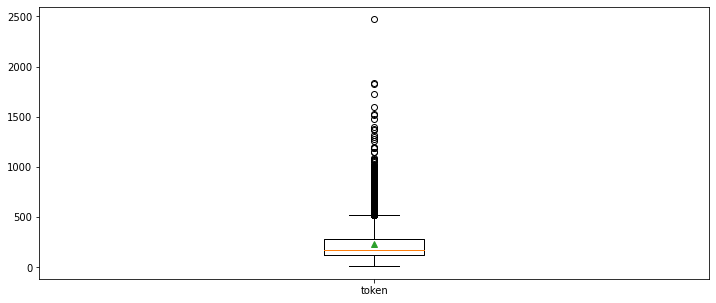

In [30]:
plt.figure(figsize=(12, 5))

# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token],
             labels=['token'],
             showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x66d7125c0>,
 'caps': [<matplotlib.lines.Line2D at 0x66d712b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x66d712358>],
 'medians': [<matplotlib.lines.Line2D at 0x66d71f160>],
 'fliers': [<matplotlib.lines.Line2D at 0x66d71f630>],
 'means': [<matplotlib.lines.Line2D at 0x66d71f438>]}

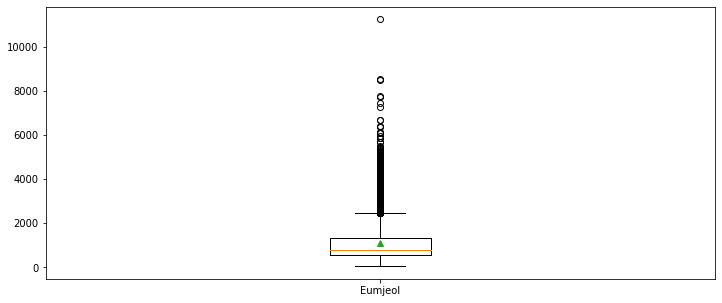

In [33]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
             labels=['Eumjeol'], 
             showmeans=True)

# 워드 클라우드

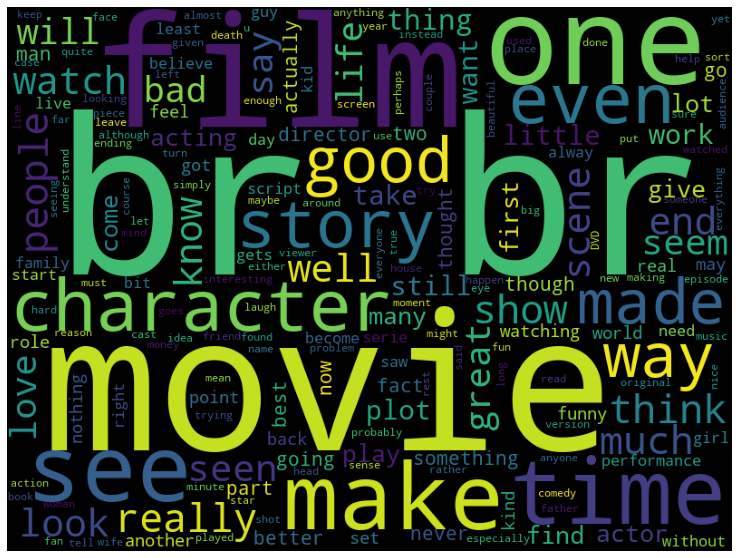

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, 
                      background_color = 'black', 
                      width = 800, 
                      height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 긍정 부정 분포

/Users/ohyeji/anaconda3/envs/tf2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sentiment', ylabel='count'>

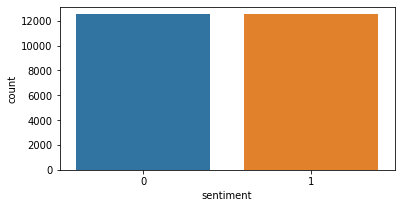

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])

In [51]:
sentiment

1    12500
0    12500
Name: sentiment, dtype: int64

### seaborn 참고
- https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html